# <font color=orange> Python Tutorial for CRUD operations on Google's firebase firestore.</font>
This is a **Python Tutorial for CRUD operations** in Google's firebase firestore.
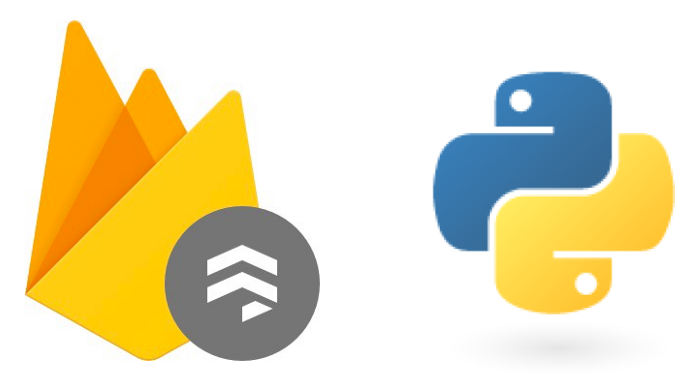
## **Contents:-**
1- Import and Initialize firebase firestore.<br>
2- **CREATE** Firestore Database from firestore<br>
3- Write or **INSERT** data from firestore<br>
4- **Update or Edit** data from firestore<br> 
5- **Read or Fetch** data from firestore<br> 
6- **Delete** data from firstore<br> 
7- **Batched writes** queries.<br>
8- **Conclusion**
<br>
### 1-Import and Initialize firebase firestore.
- To get started first you need to go to the https://firebase.google.com/<br>
- Then Create a new project if already not created.Click on Add project
- Give a project title 
- After the project is created click on the **Settings** from the left side bar and then click on the service accounts from   the tab bar and then choose python from there.After the python is selected.click on **Generate new private key** button.
- For this tutorial, place where the python jupyter note book file is placed in which you are working.Rename the file to <font color=red>**serviceAccountKey.json**</font>.
- Again navigate to the sidebar and click on the **Firestore Database** Tab.
- Click on the **Create database** button.
- Click on the start in **test mode** and click **next**.
- Click on the **Enable** button.It will create the cloud firestore for you.
- <font color=green>**Congratulations!**</font> Now you are ready to go.
- The below code will import and intialize your firebase admin and firebase firestore database.

In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccountKey.json') 
    default_app = firebase_admin.initialize_app(cred)


The below code will store the firestore database client in <font color=blue>db</font> variable.

In [2]:
db=firestore.client()

### 2-**CREATE** Firestore Database
The Firestore databases is just a bundle of collections.We can create collection easily through giving it any nameThis name of collection will be used in the addition,editing,deletion of collection records.The below command will create a collection name **"person"**.

In [3]:
database_collection = db.collection('persons')

### 3- Write OR **INSERT** data
To insert the data we use .add function after creating the collection.After we created the collection we can easily insert data and add data in that collection.<br>
the below code will insert the object in the database.As Firebase Firestore is a **NO SQL** database it uses json format to store data we insert data in **JSON format**.<br>
_JSON_:A JSON is nothing but an array of Objects with keys.More specifically called key,value pairs separated by commas.<br>
like dataset is an object array or JSON<br>
data_set = {"key1": [1, 2, 3], "key2": [4, 5, 6]}
<br>
Remember each collection in firestore has further documents.Each document must have a unique key.If we dont specify the document id an auto generated unique docuement id is automatically given when a new record is inserted and thats the best way because you dont have to think about ids firestore will automatically manage it for you.<br> 
Any valid object can be added in the firestore collection.Like below.

In [6]:
#Creating an Object named SampleObject which we are going to insert in the database
SampleObject = {
    "name":"bilal",
    "age":20,
    "gender":"male",
    "Field":"Computer Science"
};
#by add function on collection variable we can easily insert data
database_collection.add(SampleObject)

(DatetimeWithNanoseconds(2021, 6, 13, 5, 32, 17, 604266, tzinfo=datetime.timezone.utc),
 <google.cloud.firestore_v1.document.DocumentReference at 0x14ac09362e0>)

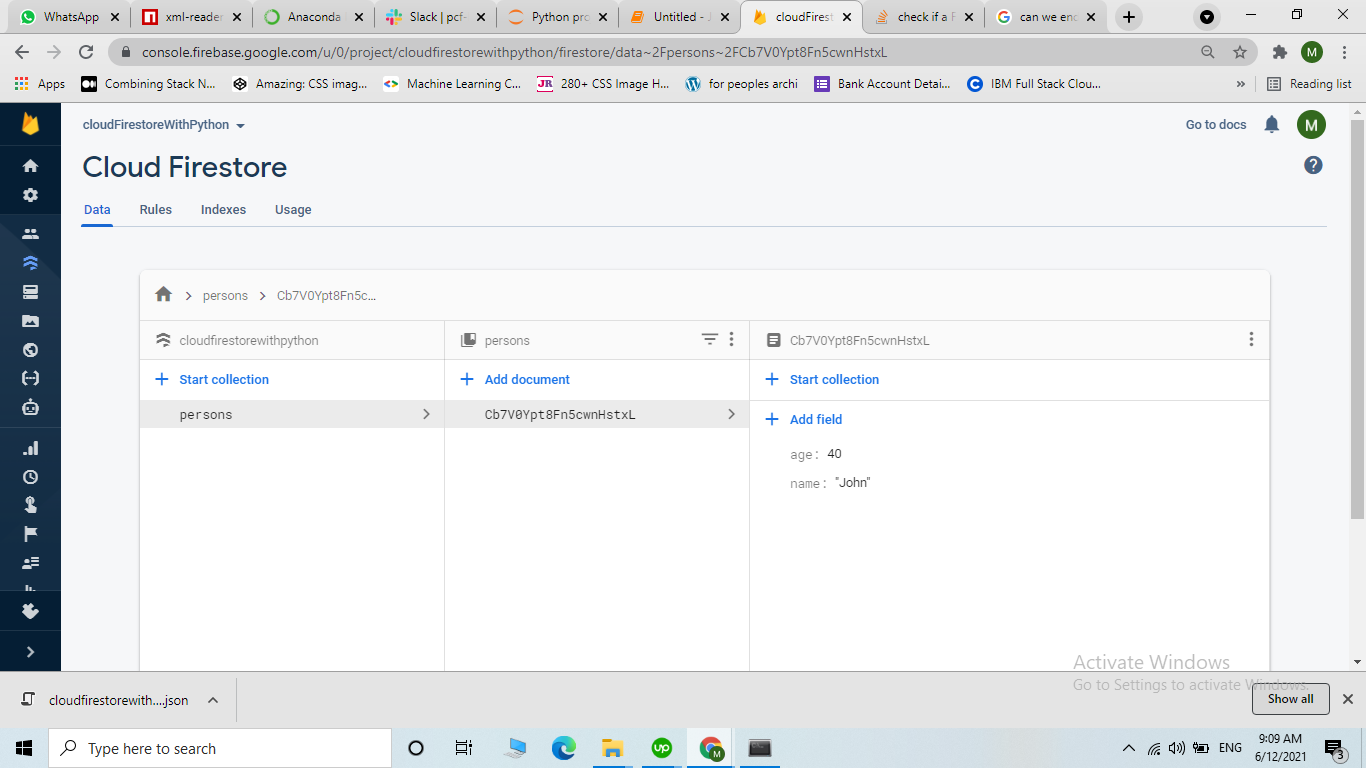<br>
The following thing will be shown in firestore dashboard once you run the command and then if you will run again a new record with a (unique key or an auto generated document ID) in the same collection with the same data will be inserted untill or unless you change the data.

### 4- **Update or Edit** data from firestore
When we store data its very necessary sometimes to change for example a user uploads his image in the database then later on he thoughts to change his profile picture.Actually he updates the data in the database by changing his profile picture.<br>
**Updating the data** is simple what we need is that we need an **document id** to target which document record we need to update or edit.Like below command updates the document record in the already created collection called 'persons'.
Consider we have the two same records in the firestore collection 'persons' which can be achieved by executing the insert code in the previous step two times.As Document id is autogenerated.
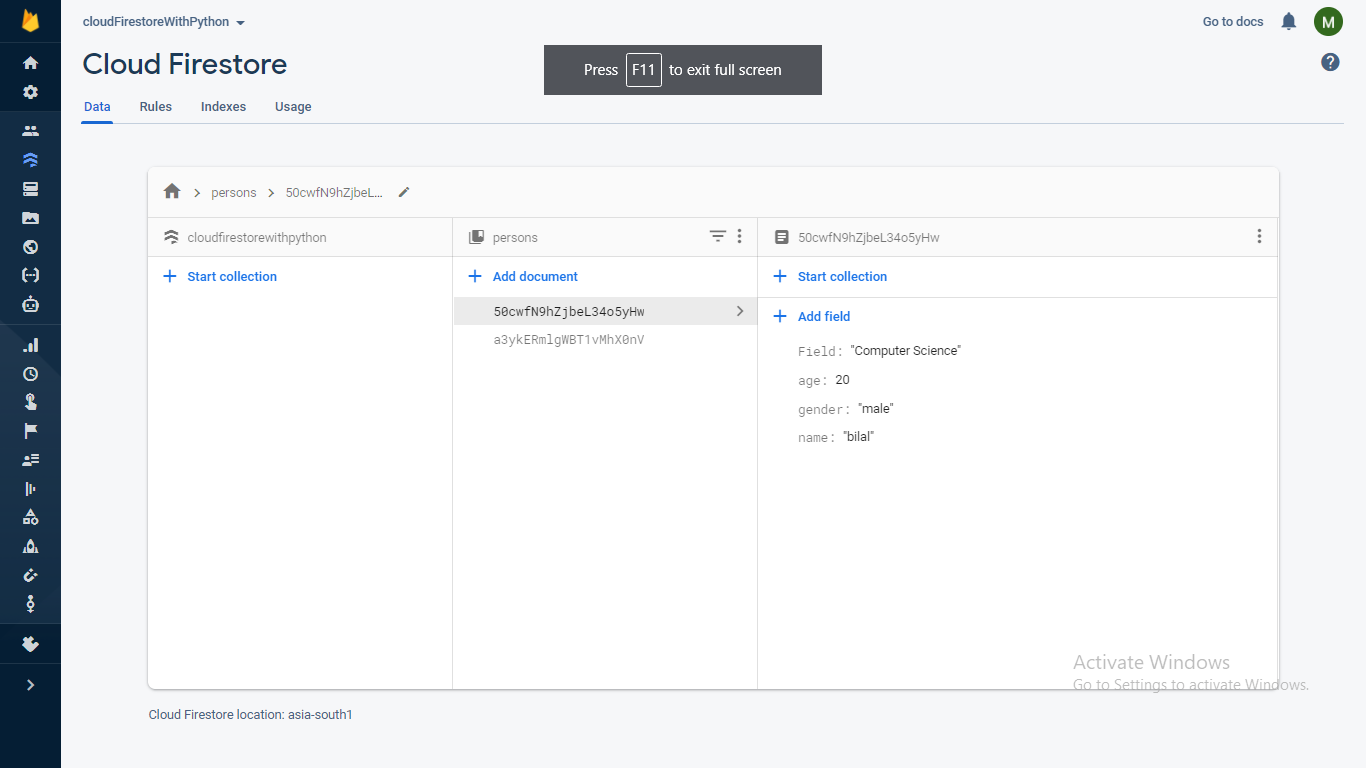<br>
So we target with the document ID a3ykERmlgWBT1vMhX0nV to update the record 'Field' as "Electrical Engineering updated" as below.

In [36]:
database_collection.document('a3ykERmlgWBT1vMhX0nV').update({'Field': "Electrical engineering updated"})

update_time {
  seconds: 1623495568
  nanos: 647729000
}

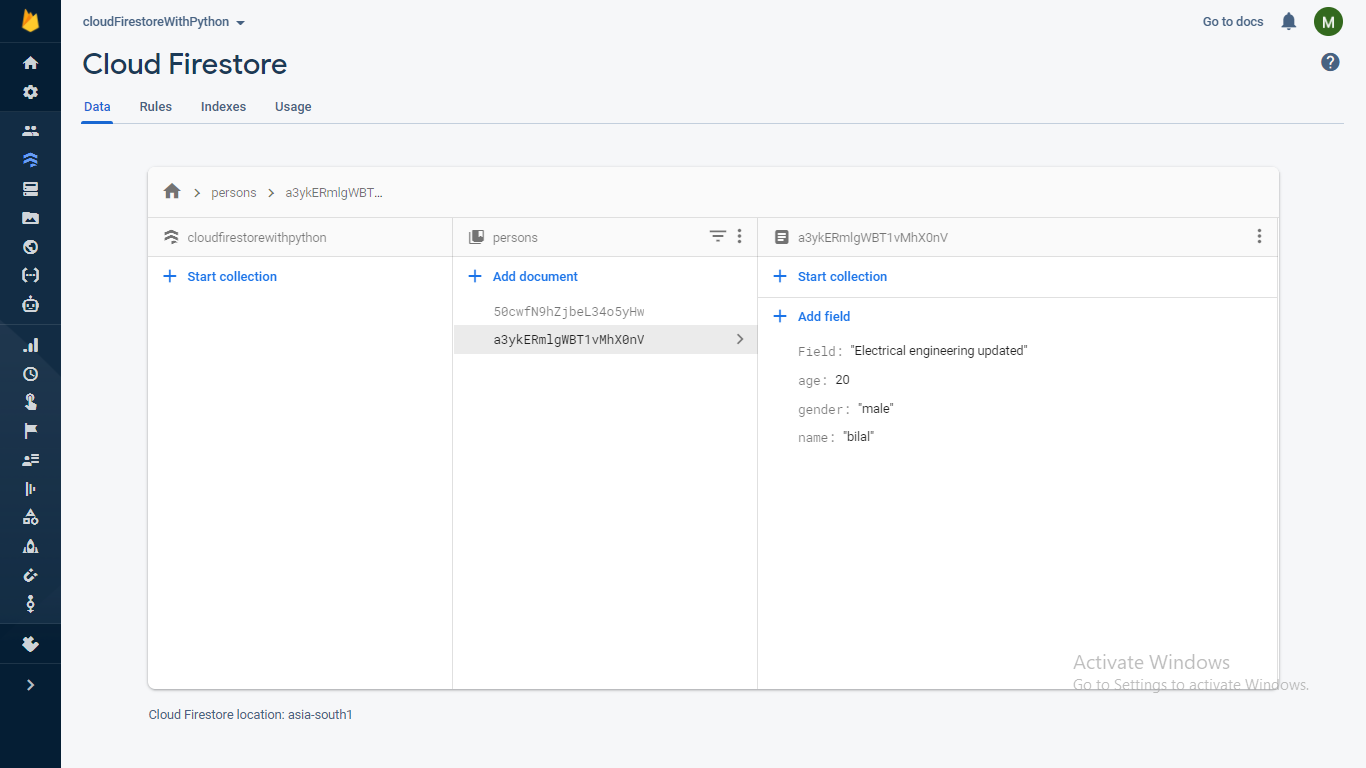<br>
As you you can see the document with id <font color=red>'a3ykERmlgWBT1vMhX0nV'</font> has an updated "Field" having value of <font color=green>"Electrical engineering updated"</font> value.So <font color=green>Congratulations</font> you can now update any record in the database of firestore by targetting its docuement ID.<br>
Please note that we can update either only one record in the specified id or multiple record or all records as we wish.For example 
the following command will change document id <font color=red>'50cwfN9hZjbeL34o5yHw'</font> record "name" to <font color=blue>"Anny Watson"</font>,gender to <font color=red>"Female"<font> , age to <font color=blue>18</font>, Field to <font color=blue>"biology"</font> as below.

In [37]:
database_collection.document('50cwfN9hZjbeL34o5yHw').update({ 
    "name":"Anny Watson",
    "age":18,
    "gender":"Female",
    "Field":"biology"})

update_time {
  seconds: 1623496534
  nanos: 151956000
}

As you can see in the below snapshot image the records are updated in the document id <font color=red>'50cwfN9hZjbeL34o5yHw'</font> is updated as soon as the above code is executed.<br>
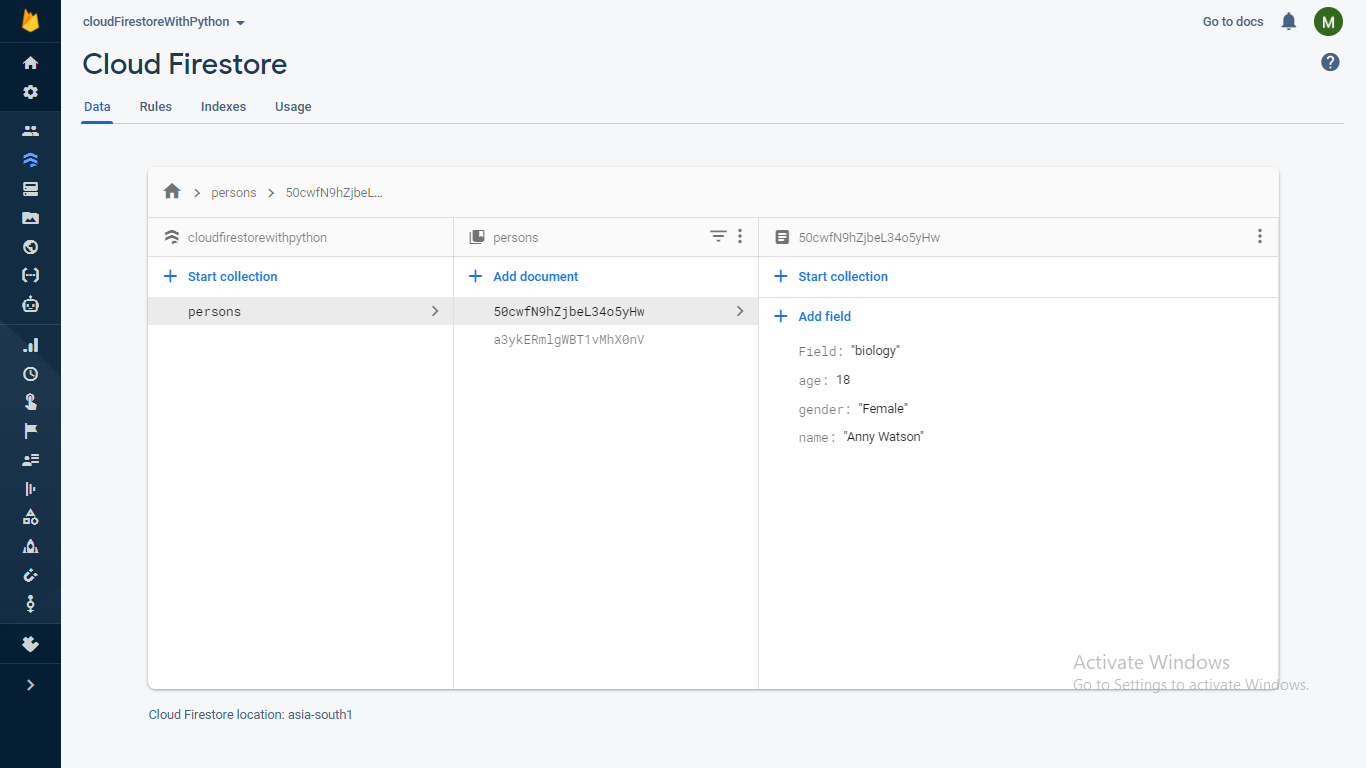<br>

### 5- **Read or Fetch** data from firestore
In order or to read or fetch data there are two options for us
- Read the data once
- Listen for realtime updates from firestore.<br>
The first option i will discuss here so we know how we can read data once.Although the second option is actually used in professional development because realtime update and fetching of data is the great quality of firestore which must be used for its amazing feature and user experience.
- #### Read the data once
In order to read the data once without realtime updates,the following command will be used.
But this will not update when the firestore updates.Lets see how do this

In [38]:
docs = database_collection.stream()

for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

50cwfN9hZjbeL34o5yHw => {'age': 18, 'Field': 'biology', 'name': 'Anny Watson', 'gender': 'Female'}
a3ykERmlgWBT1vMhX0nV => {'Field': 'Electrical engineering updated', 'gender': 'male', 'name': 'bilal', 'age': 20}


As you can see it printed all the documents but its not realtime.For realtime data fetching the following command will be sufficient.
-  ## <font color=purple>Listen for realtime updates from firestore</font>

In [52]:
import threading
# Create an Event for notifying main thread.
callback_done = threading.Event()

# Create a callback on_snapshot function to capture changes
def on_snapshot(doc_snapshot, changes, read_time):
    for doc in doc_snapshot:
        print(f'{doc.id} => {doc.to_dict()}')
    callback_done.set()

doc_ref = database_collection

# Watch the document
doc_watch = doc_ref.on_snapshot(on_snapshot)

50cwfN9hZjbeL34o5yHw => {'name': 'Anny Watson', 'gender': 'Female', 'age': 18, 'Field': 'biology'}
a3ykERmlgWBT1vMhX0nV => {'name': 'bilal', 'gender': 'male', 'age': 20, 'Field': 'Electrical engineering updated'}
50cwfN9hZjbeL34o5yHw => {'gender': 'Female', 'Field': 'biology', 'name': 'Anny Watson updated', 'age': 18}
a3ykERmlgWBT1vMhX0nV => {'name': 'bilal', 'gender': 'male', 'age': 20, 'Field': 'Electrical engineering updated'}


<font color=green>Congratulations</font> we successfully have read the data in the realtime update form now our data will update as soon as there will be any change in any original cloud firestore database.

### 6- **Delete** data from firstore
**Deleting data**
_Firebase firestore data is a set of collections.You can delete a collection or a document or what so ever you like to delete.Just use delete() method by targetting the collection or a document or a subdocument.Now first we will see how we can delete a document._
- Deleting a document
To delete a document its simple just we need to target the document id which we want to target.
Like the below command deletes the document **cities** with document ID **NYC** which we created above.
This is before deleting<br>
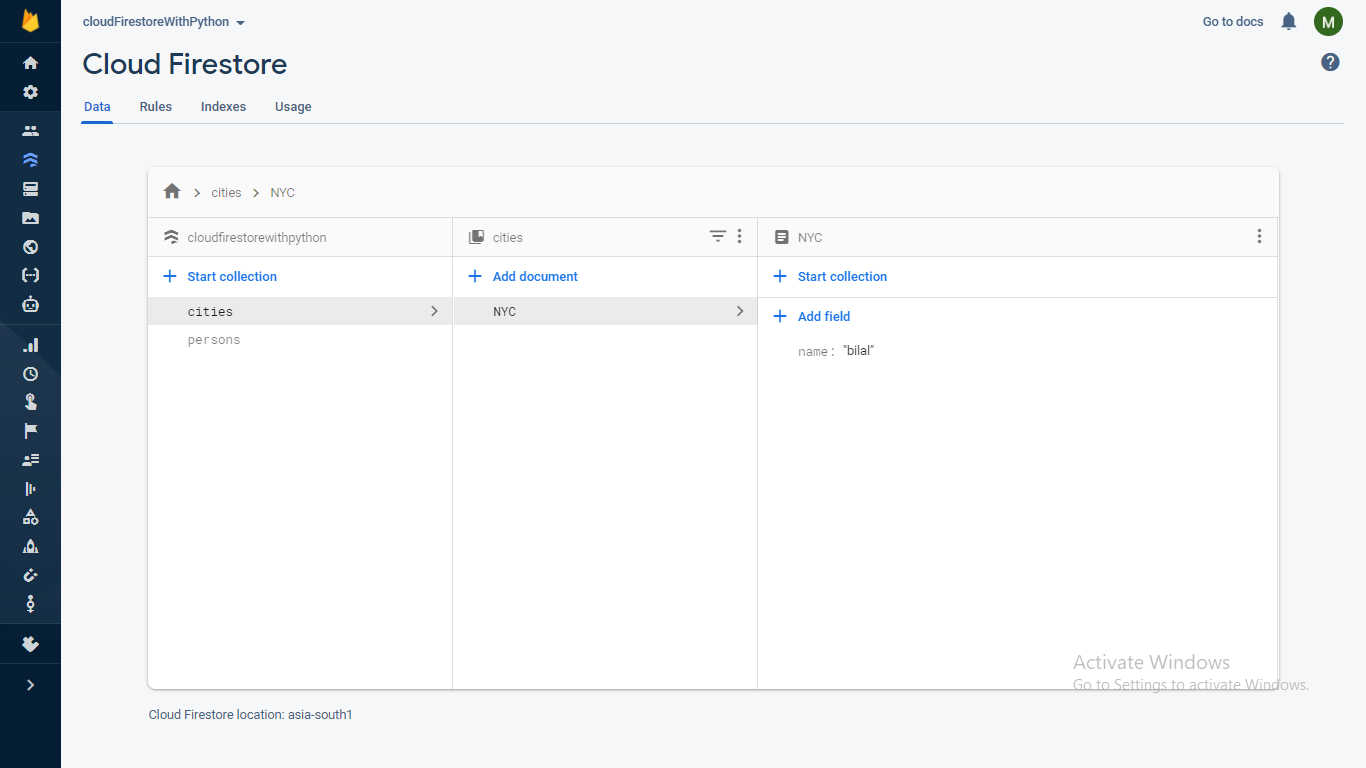
Now lets execute the delete operation.

In [7]:
db.collection('cities').document('NYC').delete()

DatetimeWithNanoseconds(2021, 6, 13, 5, 34, 39, 948547, tzinfo=datetime.timezone.utc)

<font color=red>**Warning: Deleting a document does not delete its subcollections!**</font><br><br>
Now you can observer that it deleted the document with id <font color=red>**NYC**</font>.<br>
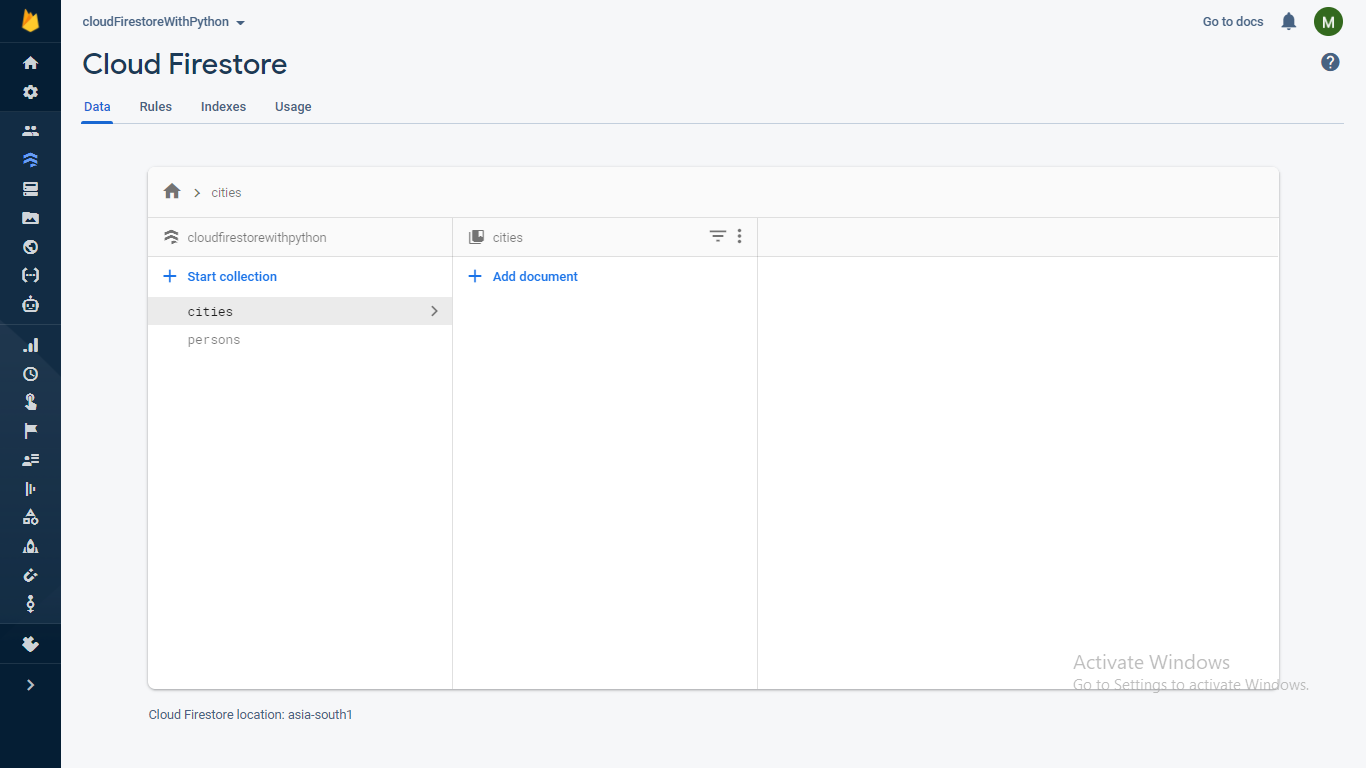


Similary you can delete the whole collection like this.
### Delete fields.
To delete specific fields from a document, use the FieldValue.delete() method when you update a document:

In [18]:
city_ref = db.collection(u'cities').document(u'NYC')
city_ref.update({
    u'name': firestore.DELETE_FIELD
})

update_time {
  seconds: 1623563674
  nanos: 641153000
}

Now you can observe that we delete the document with id <font color=red>**NYC**</font> in collection named **cities**.
with key <font color=orange>**name**</font>
and it disappeared from the firestore.

### 7- **Batch write** queries

In [11]:
batch = db.batch()

# Set the data for NYC
nyc_ref = db.collection('cities').document(u'NYC')
batch.set(nyc_ref, {u'name': u'New York City'})

nyc_ref = db.collection('cityCheck').document(u'NYC')
batch.set(nyc_ref, {u'name': u'New York City'})

# Update the population for SF
sf_ref = db.collection('cities').document(u'NYC')
batch.update(sf_ref, {'name': 'bilal'})

# Delete DEN
den_ref = db.collection('cityCheck').document(u'NYC')
batch.delete(den_ref)

# Commit the batch
batch.commit()

[update_time {
   seconds: 1623563208
   nanos: 503828000
 },
 ,
 update_time {
   seconds: 1623563208
   nanos: 503828000
 },
 ]

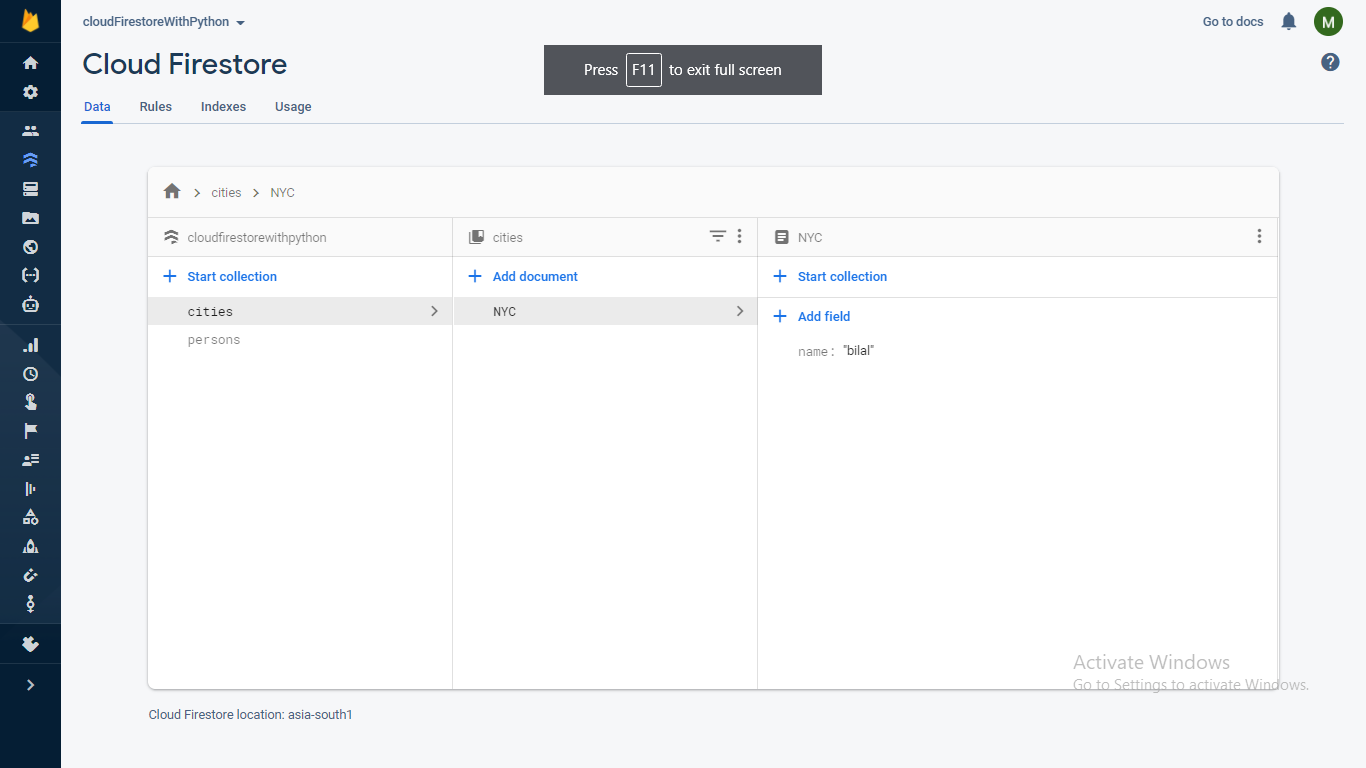<br>
As you can see it executed multiple batch operations simulataneosly and created a collection named **cities** with a document id **NYC** and then it created another collection named **cityCheck** with a document id **NYC** and then it updated the collection **cities** with document id **NYC** and changed its property name to **bilal**
and then afte that it deleted the collection named **cityCheck** with document id **NYC** and this all happened in one batch.This was an example of **batched write operations**.


# **Conclusion** :
Ok So now we walked through through the basics of <font color=blue>CRUD</font> operations in <font color=green>Cloud Firestore</font> along with **Batched writes** using <font color=orange>python</font>.Its impossible to cover complete knowledge of firestore.But these fundamentals are very necessary to get you started and make you able to work in firestore using python.Thanks.